In [1]:
#Importing the libraries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
%matplotlib inline

In [3]:
#Reading the csv file and converting the date into 'Datetime' format
df=pd.read_csv('covid_19_clean_complete.csv',parse_dates=['Date'])
df.head(5)

Province/State Country/Region      Lat     Long       Date  Confirmed  \
0            NaN    Afghanistan  33.0000  65.0000 2020-01-22          0   
1            NaN        Albania  41.1533  20.1683 2020-01-22          0   
2            NaN        Algeria  28.0339   1.6596 2020-01-22          0   
3            NaN        Andorra  42.5063   1.5218 2020-01-22          0   
4            NaN         Angola -11.2027  17.8739 2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39933 entries, 0 to 39932
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  11934 non-null  object        
 1   Country/Region  39933 non-null  object        
 2   Lat             39933 non-null  float64       
 3   Long            39933 non-null  float64       
 4   Date            39933 non-null  datetime64[ns]
 5   Confirmed       39933 non-null  int64         
 6   Deaths          39933 non-null  int64         
 7   Recovered       39933 non-null  int64         
 8   Active          39933 non-null  int64         
 9   WHO Region      39933 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.0+ MB


In [5]:
#'Province/State' had null values and since we do not require that column, we can remove that.
df.drop(['Province/State'],axis=1,inplace=True)
#Renaming the 'Country/Region' column.
df.rename(columns={'Country/Region':'Country'},inplace=True)
df.head(5)

Country      Lat     Long       Date  Confirmed  Deaths  Recovered  \
0  Afghanistan  33.0000  65.0000 2020-01-22          0       0          0   
1      Albania  41.1533  20.1683 2020-01-22          0       0          0   
2      Algeria  28.0339   1.6596 2020-01-22          0       0          0   
3      Andorra  42.5063   1.5218 2020-01-22          0       0          0   
4       Angola -11.2027  17.8739 2020-01-22          0       0          0   

   Active             WHO Region  
0       0  Eastern Mediterranean  
1       0                 Europe  
2       0                 Africa  
3       0                 Europe  
4       0                 Africa

In [6]:
#Finding the latest info about the countries.
top=df[df['Date']==df['Date'].max()]
top.head()

Country      Lat     Long       Date  Confirmed  Deaths  Recovered  \
39672  Afghanistan  33.0000  65.0000 2020-06-22      29157     598       8841   
39673      Albania  41.1533  20.1683 2020-06-22       1995      44       1159   
39674      Algeria  28.0339   1.6596 2020-06-22      11920     852       8559   
39675      Andorra  42.5063   1.5218 2020-06-22        855      52        796   
39676       Angola -11.2027  17.8739 2020-06-22        186      10         77   

       Active             WHO Region  
39672   19718  Eastern Mediterranean  
39673     792                 Europe  
39674    2509                 Africa  
39675       7                 Europe  
39676      99                 Africa

In [7]:
# Grouping the given dataset based on Countries.
world=top.groupby('Country')['Confirmed','Recovered','Deaths','Active'].sum().reset_index()
world.head()

C:\Users\S540 A2IN\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Country  Confirmed  Recovered  Deaths  Active
0  Afghanistan      29157       8841     598   19718
1      Albania       1995       1159      44     792
2      Algeria      11920       8559     852    2509
3      Andorra        855        796      52       7
4       Angola        186         77      10      99

# Exploritory Data Analysis

Plotting on the world map

In [8]:
figure= px.choropleth(world,locations='Country',locationmode='country names',color='Active',hover_name='Country',
                     range_color=[1,10000],color_continuous_scale='Peach',title='Countries with active cases')
figure.show()

In [9]:
figure= px.choropleth(world,locations='Country',locationmode='country names',color='Confirmed',hover_name='Country',
                     range_color=[1,10000],color_continuous_scale='Peach',title='Countries with confirmed cases')
figure.show()

In [10]:
figure= px.choropleth(world,locations='Country',locationmode='country names',color='Deaths',hover_name='Country',
                     range_color=[1,10000],color_continuous_scale='Peach',title='Countries with death cases')
figure.show()

In [11]:
figure= px.choropleth(world,locations='Country',locationmode='country names',color='Recovered',hover_name='Country',
                     range_color=[1,10000],color_continuous_scale='Peach',title='Countries with recovered cases')
figure.show()

Top 20 Countries with highest number of confirmed, recovered, active and death cases

In [12]:
top_conf=top.groupby('Country')['Confirmed','Recovered','Deaths','Active'].sum().sort_values(['Confirmed'],ascending=False).reset_index()
top20=top_conf.head(20)
top20.head(2)

C:\Users\S540 A2IN\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Country  Confirmed  Recovered  Deaths   Active
0      US    2312302     640198  120402  1551702
1  Brazil    1106470     601736   51271   453463

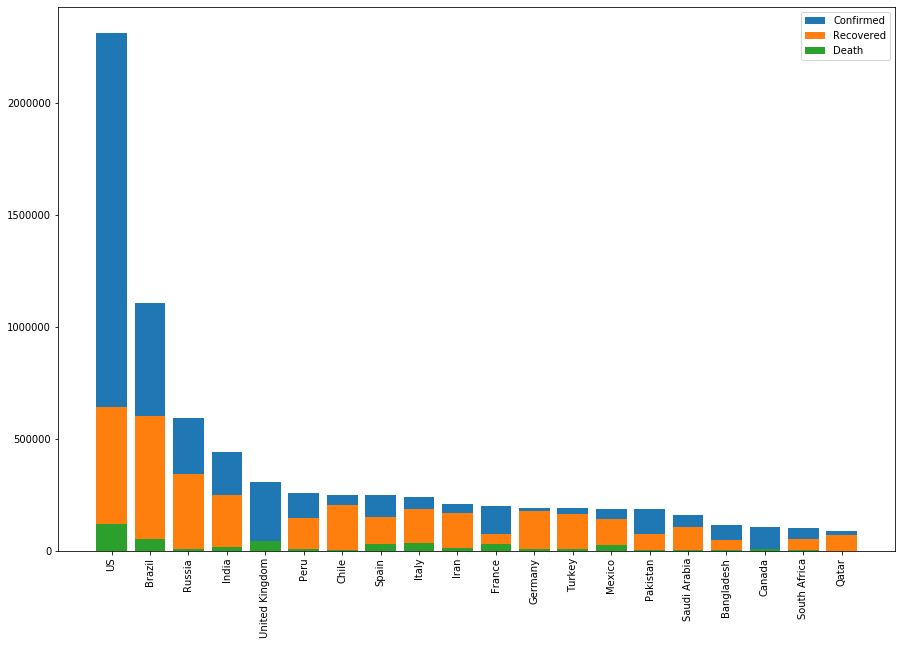

In [13]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
plt.bar(top20['Country'],top20['Confirmed'],label='Confirmed')
plt.bar(top20['Country'],top20['Recovered'],label='Recovered')
plt.bar(top20['Country'],top20['Deaths'],label='Death')
plt.legend()

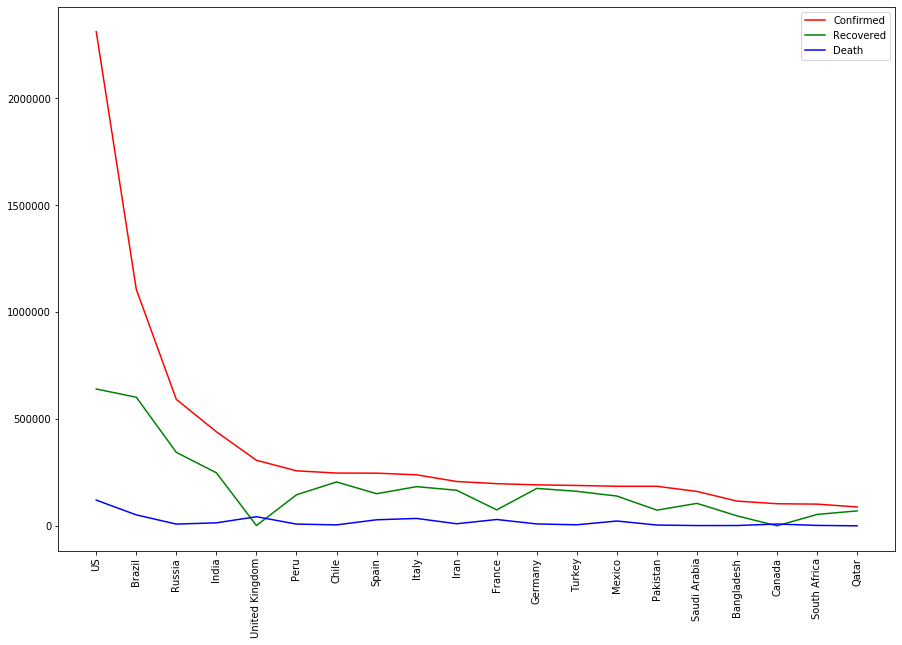

In [14]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
plt.plot(top20['Country'],top20['Confirmed'],c='r',label='Confirmed')
plt.plot(top20['Country'],top20['Recovered'],c='g',label='Recovered')
plt.plot(top20['Country'],top20['Deaths'],c='b',label='Death')
plt.legend()

Text(0.5, 1.0, 'Top 20 Countries with most no. of confirmed cases')

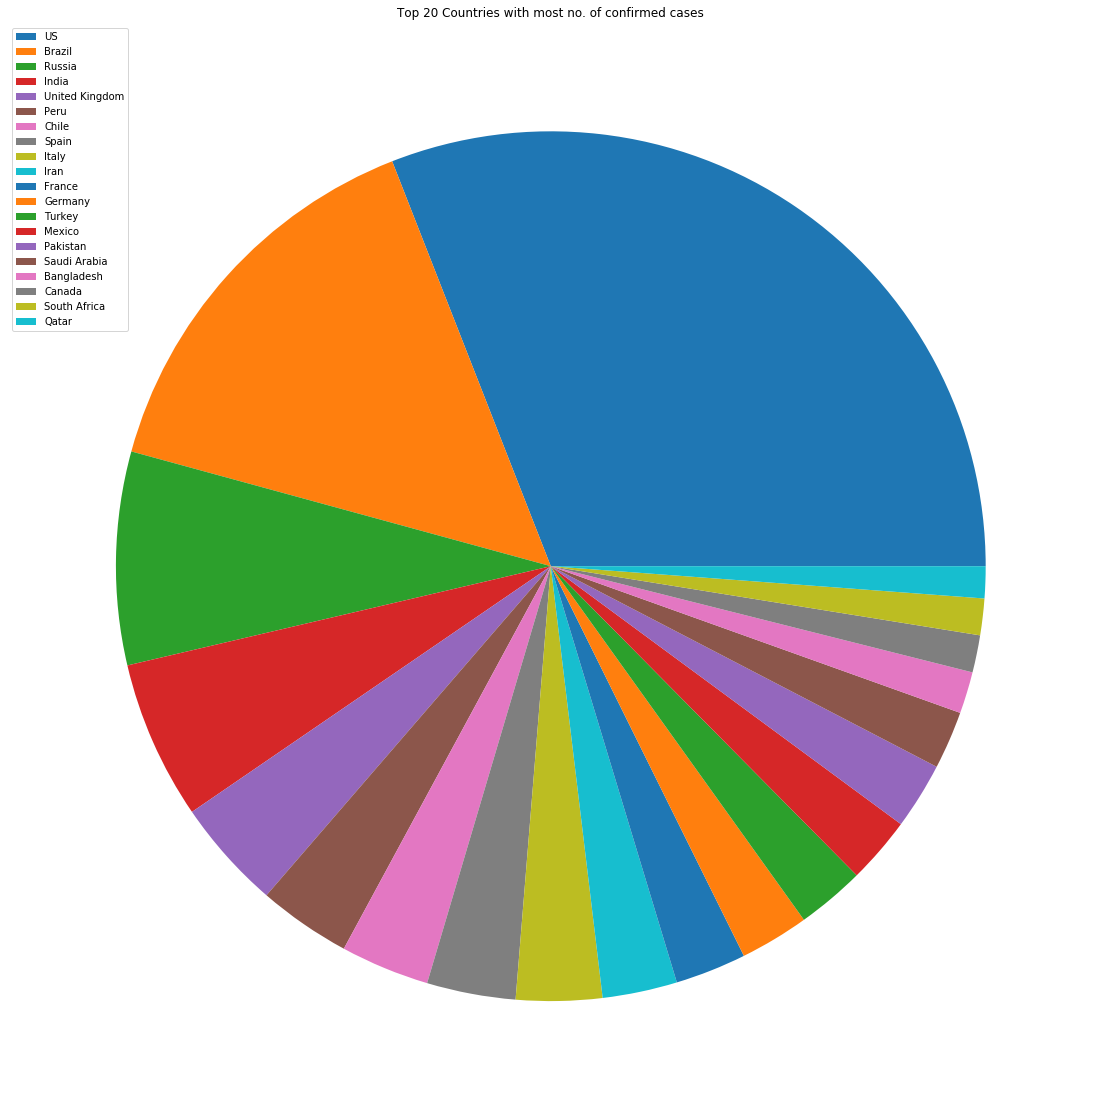

In [15]:
plt.figure(figsize=(20,20))
plt.pie(top20['Confirmed'])
plt.legend(top20['Country'],loc='best')
plt.title('Top 20 Countries with most no. of confirmed cases')

# Analysis about India

In [16]:
#Separating 'India' from other countries of the dataset
india=df[df['Country']=='India']
india= india.groupby('Date')['Confirmed','Deaths','Recovered','Active'].sum().reset_index()
india=india.iloc[8:].reset_index().drop('index',axis=1)

C:\Users\S540 A2IN\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [17]:
india.tail(2)

Date  Confirmed  Deaths  Recovered  Active
143 2020-06-21     425282   13699     237196  174387
144 2020-06-22     440215   14011     248190  178014

Total confirmed cases in India:  440215
Total active cases in India:  178014
Total death cases in India:  14011
Total people recovered in India:  248190


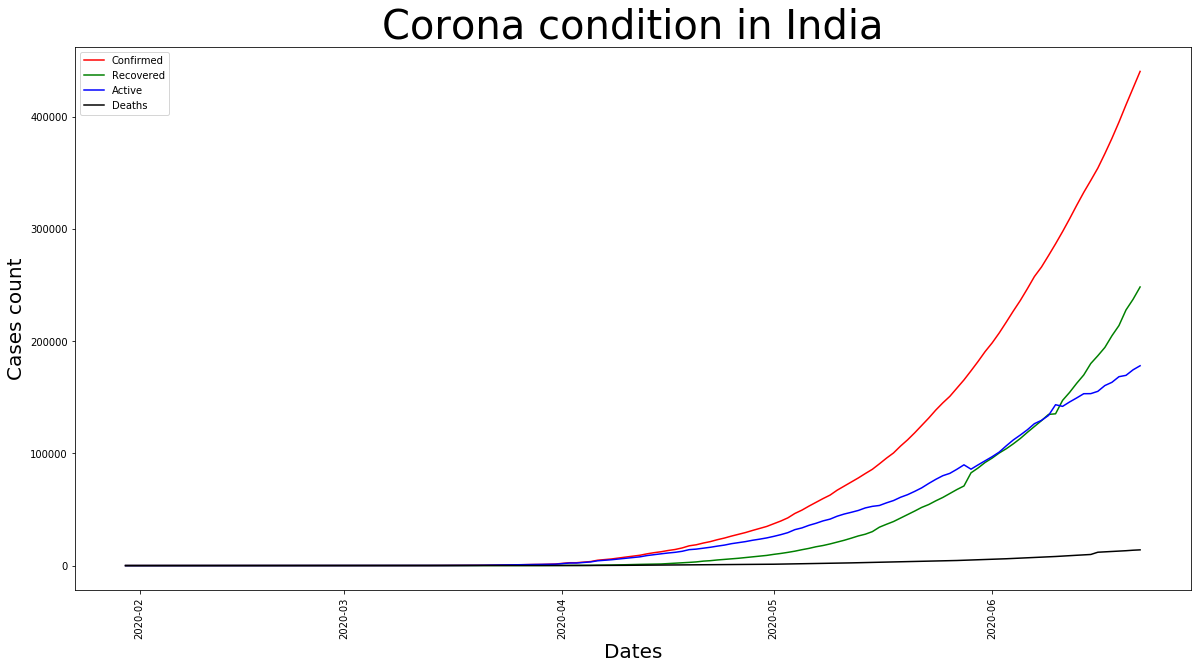

In [18]:
#Plotting the status of cases in india
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)

plt.plot(india['Date'],india['Confirmed'],c='r',label='Confirmed')
plt.plot(india['Date'],india['Recovered'],c='g',label='Recovered')
plt.plot(india['Date'],india['Active'],c='b',label='Active')
plt.plot(india['Date'],india['Deaths'],c='black',label='Deaths')
plt.legend()

plt.title('Corona condition in India',fontsize=40)
plt.xlabel('Dates',fontsize=20)
plt.ylabel('Cases count',fontsize=20)

print('Total confirmed cases in India: ',india['Confirmed'].max())
print('Total active cases in India: ',india['Active'].max())
print('Total death cases in India: ',india['Deaths'].max())
print('Total people recovered in India: ',india['Recovered'].max())

# Machine Learning using 'Prophet'

# 1.Predictions for next 10 days in India

In [20]:
from fbprophet import Prophet  #Importing Prophet for time series analysis.

In [21]:
confirmed=india.groupby('Date').sum()['Confirmed'].reset_index() #getting confirmed cases in India
deaths=india.groupby('Date').sum()['Deaths'].reset_index() #getting no. of deaths in India
recovered=india.groupby('Date').sum()['Recovered'].reset_index() #getting recovered cases in India
confirmed.tail()

Date  Confirmed
140 2020-06-18     380532
141 2020-06-19     395048
142 2020-06-20     410451
143 2020-06-21     425282
144 2020-06-22     440215

Prediction of confirmed cases

In [22]:
confirmed.columns=['ds','y']  # where: 'ds'=date stamp & 'y'=what is is trying to predict.
confirmed['ds']=pd.to_datetime(confirmed['ds'])

In [23]:
model_i=Prophet(interval_width=0.95) #model is created and it is created for 95% accuracy.
model_i.fit(confirmed)
future= model_i.make_future_dataframe(periods=10)  #future predictions are made for next 10 days. 
future.tail()

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds
150 2020-06-28
151 2020-06-29
152 2020-06-30
153 2020-07-01
154 2020-07-02

In [24]:
forcast1=model_i.predict(future)
forcast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
# 'yhat'=prediction made
# 'yhat_lower'= lower limit of prediction
# 'yhat_upper'= upper limit of prediction

ds           yhat     yhat_lower     yhat_upper
150 2020-06-28  478293.826348  469251.886877  487974.080417
151 2020-06-29  488339.857941  478655.557778  498486.262193
152 2020-06-30  497130.650738  486671.898087  507460.148508
153 2020-07-01  507280.186385  496560.522027  518259.998124
154 2020-07-02  517556.139543  506153.722791  529457.390331

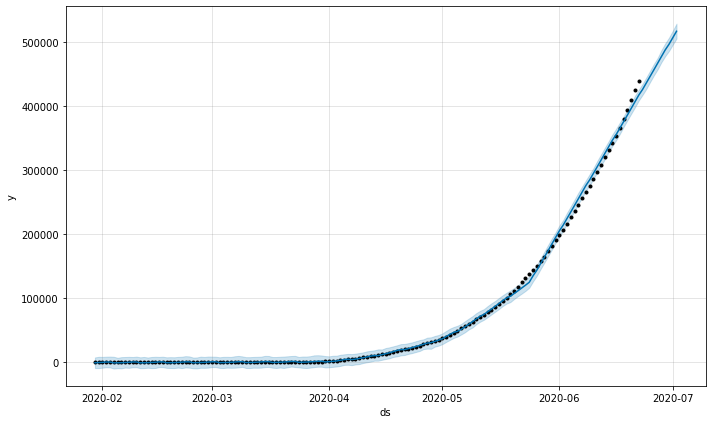

In [25]:
confirmed_forcast_plot= model_i.plot(forcast1)

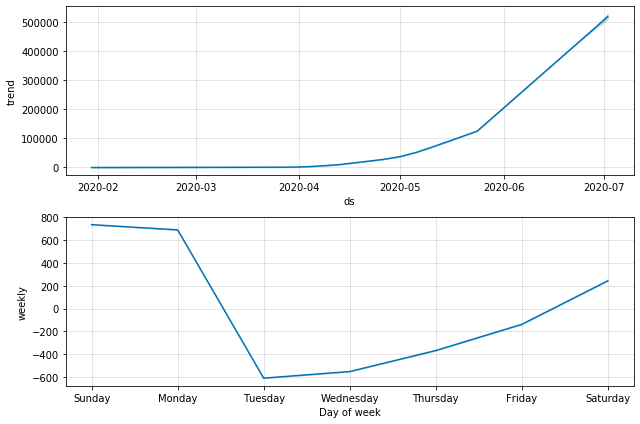

In [26]:
confirmed_forcast_plot= model_i.plot_components(forcast1)

Death cases prediction

In [27]:
deaths.columns=['ds','y']
deaths['ds']=pd.to_datetime(deaths['ds'])

In [28]:
model_i=Prophet()
model_i.fit(deaths)
future= model_i.make_future_dataframe(periods=10)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds
150 2020-06-28
151 2020-06-29
152 2020-06-30
153 2020-07-01
154 2020-07-02

In [29]:
forcast1=model_i.predict(future)
forcast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds          yhat    yhat_lower    yhat_upper
150 2020-06-28  14696.191235  14237.035593  15158.165723
151 2020-06-29  15006.144014  14548.945355  15489.510345
152 2020-06-30  15338.532080  14862.105051  15815.615452
153 2020-07-01  15650.982426  15161.490304  16118.134755
154 2020-07-02  15968.952478  15474.633217  16460.608517

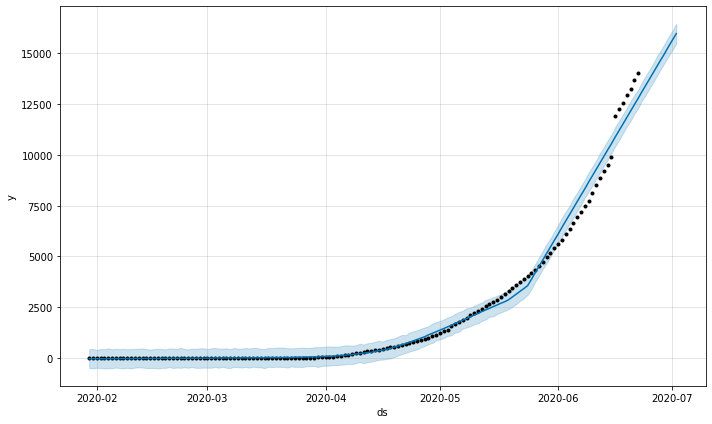

In [30]:
confirmed_forcast_plot= model_i.plot(forcast1)

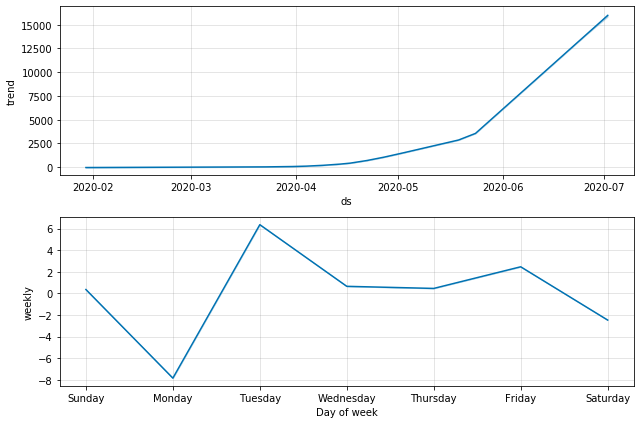

In [31]:
confirmed_forcast_plot= model_i.plot_components(forcast1)

Recovery prediction

In [32]:
recovered.columns=['ds','y']
recovered['ds']=pd.to_datetime(recovered['ds'])

model_i=Prophet()
model_i.fit(recovered)
future= model_i.make_future_dataframe(periods=10)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds
150 2020-06-28
151 2020-06-29
152 2020-06-30
153 2020-07-01
154 2020-07-02

In [33]:
forcast1=model_i.predict(future)
forcast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds           yhat     yhat_lower     yhat_upper
150 2020-06-28  259848.103668  253741.810118  265550.212014
151 2020-06-29  265999.278900  259920.652073  271447.160750
152 2020-06-30  270686.815260  264243.088890  276547.696222
153 2020-07-01  276267.836801  270241.917995  282481.166721
154 2020-07-02  282617.421967  276141.066505  288820.695830

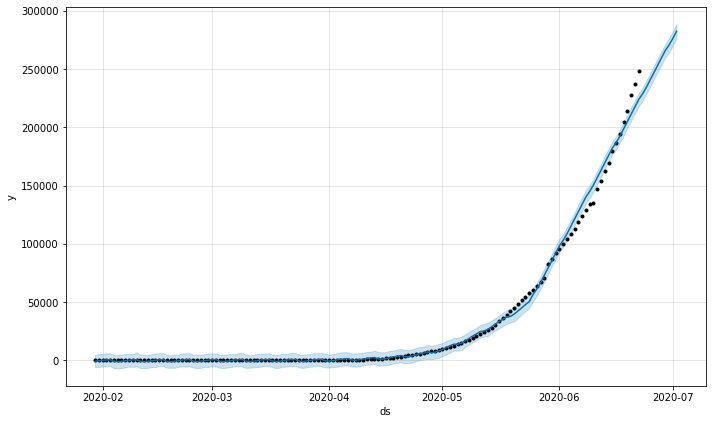

In [34]:
confirmed_forcast_plot= model_i.plot(forcast1)

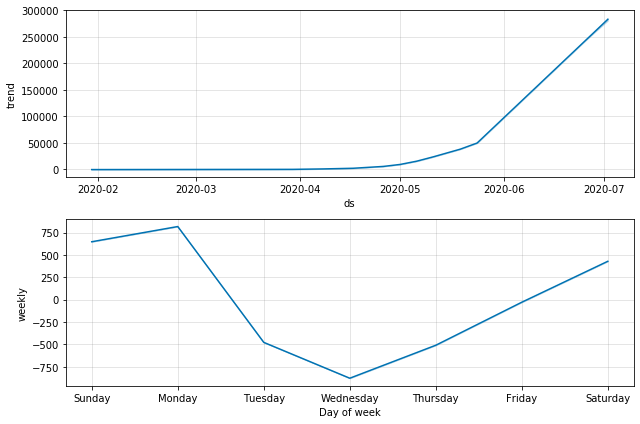

In [35]:
confirmed_forcast_plot= model_i.plot_components(forcast1)

# 2. Predictions of next 10 days in the world

In [36]:
confirmed=df.groupby('Date').sum()['Confirmed'].reset_index()
deaths=df.groupby('Date').sum()['Deaths'].reset_index()
recovered=df.groupby('Date').sum()['Recovered'].reset_index()
confirmed.tail()

Date  Confirmed
148 2020-06-18    8488235
149 2020-06-19    8666045
150 2020-06-20    8828267
151 2020-06-21    8955903
152 2020-06-22    9097902

Prediction of confirmed cases

In [37]:
confirmed.columns=['ds','y']
confirmed['ds']=pd.to_datetime(confirmed['ds'])

model_w=Prophet(interval_width=0.95)
model_w.fit(confirmed)
future= model_w.make_future_dataframe(periods=10)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds
158 2020-06-28
159 2020-06-29
160 2020-06-30
161 2020-07-01
162 2020-07-02

In [38]:
forcast2=model_w.predict(future)
forcast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds          yhat    yhat_lower    yhat_upper
158 2020-06-28  9.682690e+06  9.602374e+06  9.773467e+06
159 2020-06-29  9.800424e+06  9.706556e+06  9.895711e+06
160 2020-06-30  9.913663e+06  9.824781e+06  1.002046e+07
161 2020-07-01  1.004096e+07  9.933814e+06  1.015512e+07
162 2020-07-02  1.016960e+07  1.005004e+07  1.028969e+07

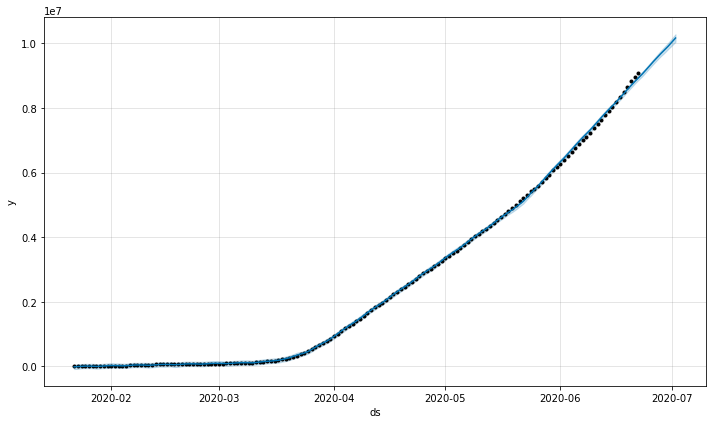

In [39]:
confirmed_forcast_plot= model_w.plot(forcast2)

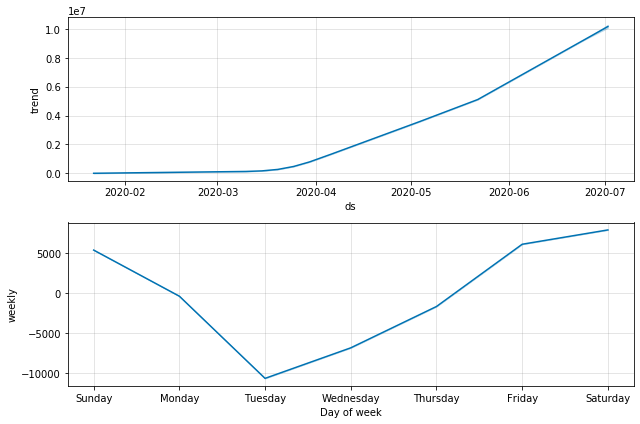

In [40]:
confirmed_forcast_plot= model_w.plot_components(forcast2)

Death prediction

In [41]:
deaths.columns=['ds','y']
deaths['ds']=pd.to_datetime(deaths['ds'])

model_w=Prophet(interval_width=0.95)
model_w.fit(deaths)
future= model_w.make_future_dataframe(periods=10)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds
158 2020-06-28
159 2020-06-29
160 2020-06-30
161 2020-07-01
162 2020-07-02

In [42]:
forcast2=model_w.predict(future)
forcast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds           yhat     yhat_lower     yhat_upper
158 2020-06-28  495992.353397  492210.485658  499633.761557
159 2020-06-29  499763.642429  494711.937982  504598.761495
160 2020-06-30  504340.396869  498607.963057  509884.334418
161 2020-07-01  509241.453209  502157.970871  515985.339387
162 2020-07-02  513909.269194  505337.171152  522013.458863

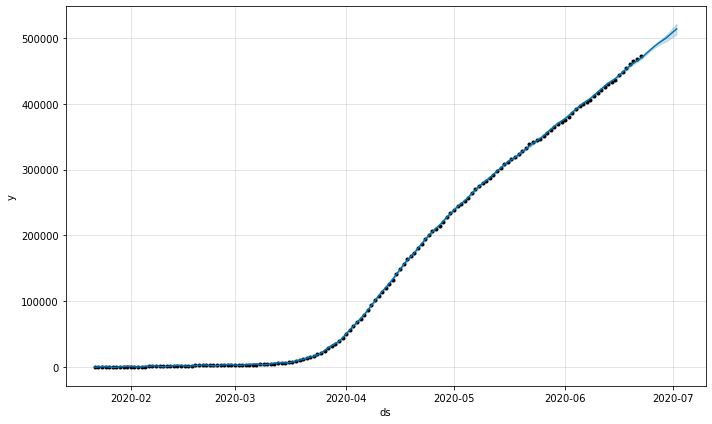

In [43]:
confirmed_forcast_plot= model_w.plot(forcast2)

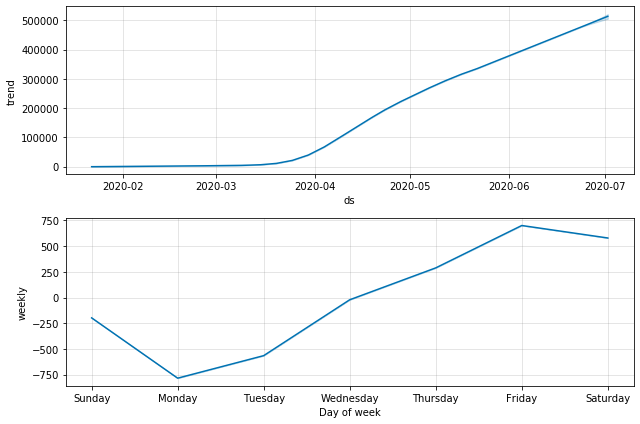

In [44]:
confirmed_forcast_plot= model_w.plot_components(forcast2)

Recovery Prediction

In [45]:
recovered.columns=['ds','y']
recovered['ds']=pd.to_datetime(recovered['ds'])

model_w=Prophet(interval_width=0.95)
model_w.fit(recovered)
future= model_w.make_future_dataframe(periods=10)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds
158 2020-06-28
159 2020-06-29
160 2020-06-30
161 2020-07-01
162 2020-07-02

In [46]:
forcast2=model_w.predict(future)
forcast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds          yhat    yhat_lower    yhat_upper
158 2020-06-28  4.851302e+06  4.800109e+06  4.909855e+06
159 2020-06-29  4.932124e+06  4.876383e+06  4.996528e+06
160 2020-06-30  5.008539e+06  4.946945e+06  5.075231e+06
161 2020-07-01  5.091520e+06  5.020928e+06  5.168592e+06
162 2020-07-02  5.171419e+06  5.093989e+06  5.252107e+06

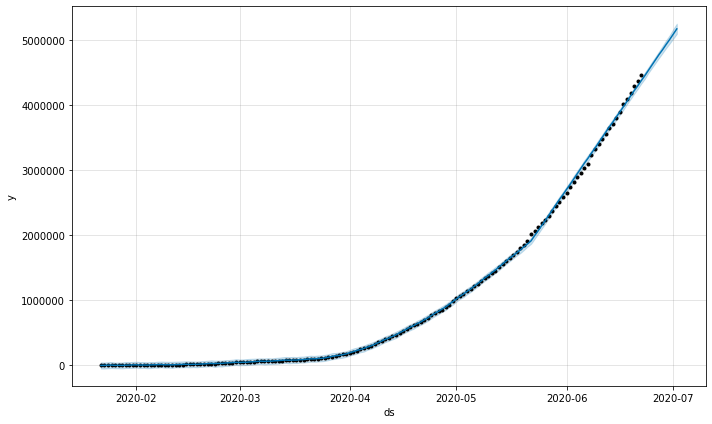

In [47]:
confirmed_forcast_plot= model_w.plot(forcast2)

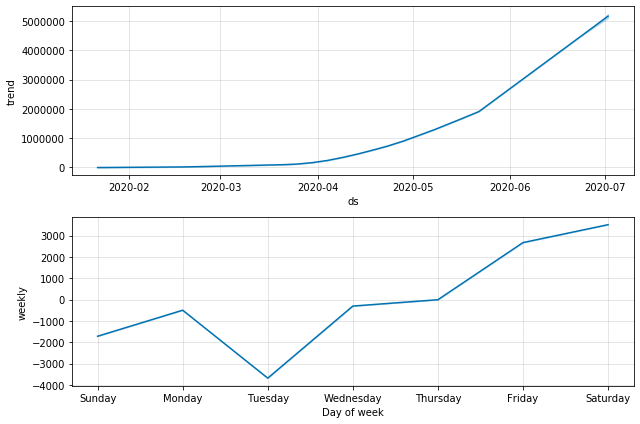

In [48]:
confirmed_forcast_plot= model_w.plot_components(forcast2)